In [20]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm

# plt.style.use("dark_background")

import ai_prentice_wasserstein
import utils

from time import time

In [2]:
turing_data = np.load("trajectories/turing.npz")
data = turing_data["data"]
data = data.reshape(*data.shape[:-1], 2, data.shape[-1] // 2).swapaxes(-2, -1).reshape(data.shape)

In [3]:
ai_prentice = ai_prentice_wasserstein.DimensionalityPrentice("turing")

In [4]:
ai_prentice.fit(data)

Normalizing
Computing distance matrix
Embedding data and computing scores
Computing the dimensionality


In [6]:
embedding = ai_prentice.embeddings[0]
eta = turing_data["params"].T[0]

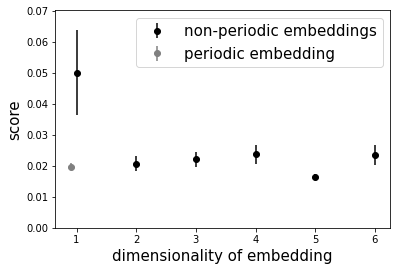

In [9]:
utils.plot_scores(plt.gca(), ai_prentice.scores, ai_prentice.errors)
plt.savefig("tp_scores.pdf")
plt.show()

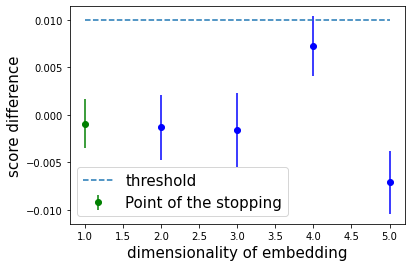

In [10]:
utils.plot_score_diffs(plt.gca(), ai_prentice.scores, ai_prentice.errors, ai_prentice.dimensionality, ai_prentice.threshold)
plt.savefig("tp_diffs.pdf")
plt.show()

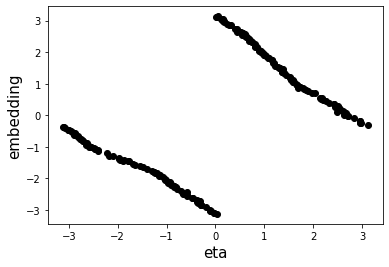

In [11]:
utils.plot_embedding_vs_conserved_quantity(plt.gca(), embedding, eta, "eta")
plt.savefig("tp_eta.pdf")
plt.show()

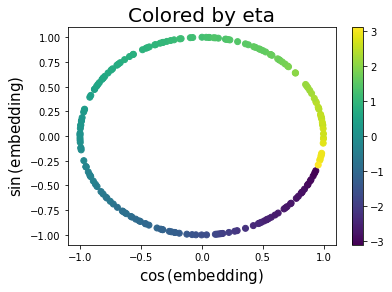

In [12]:
utils.plot_periodic_1d(*plt.subplots(), embedding, eta, "eta")
plt.savefig("tp_circle.pdf")
plt.show()

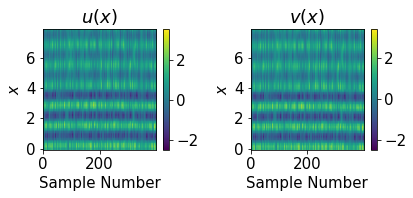

In [13]:
raw_data = turing_data["data"]

plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(6, 3))
plt.subplot(121)
plt.imshow(raw_data[0,:,::2].T, aspect='auto', origin='lower')
plt.xlabel('Sample Number')
plt.ylabel('$x$')
plt.yticks([0,12.5, 25, 37.5],[0, 2, 4, 6])
plt.colorbar()
plt.title("$u(x)$")

plt.subplot(122)
plt.imshow(raw_data[0,:,1::2].T, aspect='auto', origin='lower')
plt.xlabel('Sample Number')
plt.ylabel('$x$')
plt.yticks([0,12.5, 25, 37.5],[0, 2, 4, 6])
plt.colorbar()
plt.title("$v(x)$")
plt.tight_layout()
plt.savefig(f"tp_data.pdf", bbox_inches="tight")

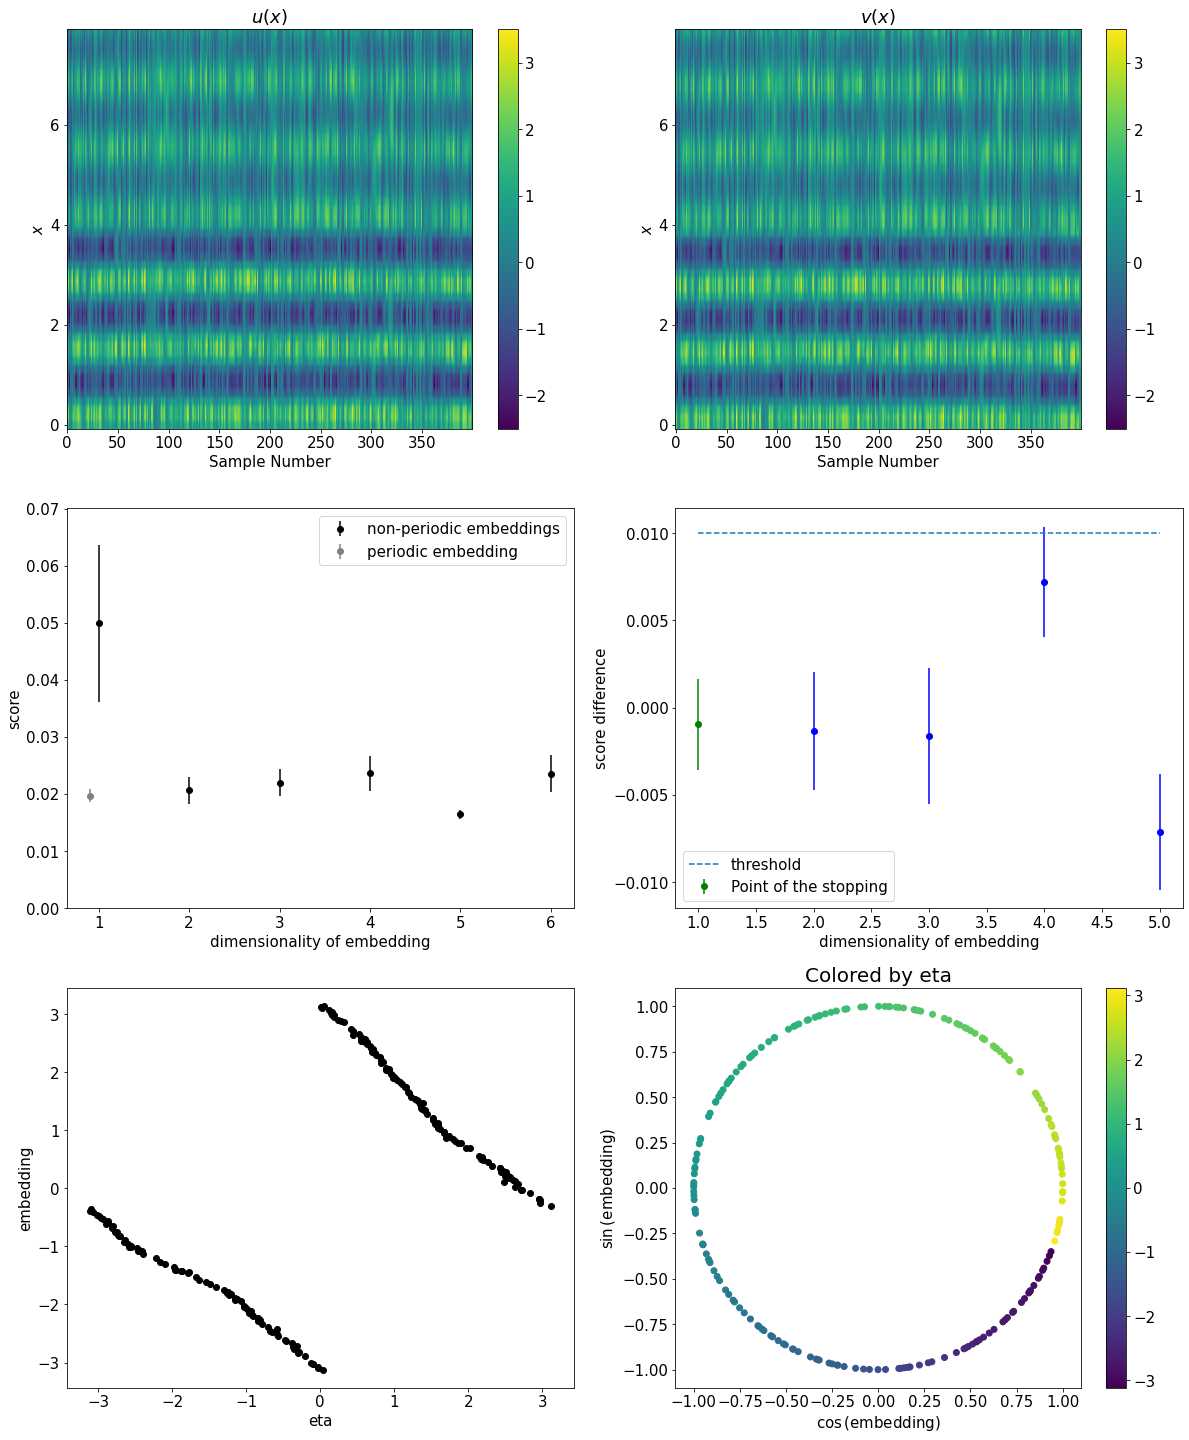

In [34]:
raw_data = turing_data["data"]

plt.rcParams.update({'font.size': 15})
fig, axes = plt.subplots(3, 2, figsize=(20, 25))

ax = axes[0][0]
ax.imshow(raw_data[0,:,::2].T, aspect='auto', origin='lower')
ax.set_xlabel('Sample Number')
ax.set_ylabel('$x$')
ax.set_yticks([0,12.5, 25, 37.5],[0, 2, 4, 6])
sm = cm.ScalarMappable(cmap='viridis')
sm.set_array(raw_data[0,:,::2])
fig.colorbar(sm, ax=ax)
ax.set_title("$u(x)$")

ax = axes[0][1]
ax.imshow(raw_data[0,:,1::2].T, aspect='auto', origin='lower')
ax.set_xlabel('Sample Number')
ax.set_ylabel('$x$')
ax.set_yticks([0,12.5, 25, 37.5],[0, 2, 4, 6])
sm = cm.ScalarMappable(cmap='viridis')
sm.set_array(raw_data[0,:,::2])
fig.colorbar(sm, ax=ax)
ax.set_title("$v(x)$")
# plt.tight_layout()

utils.plot_scores(axes[1][0], ai_prentice.scores, ai_prentice.errors)
utils.plot_score_diffs(axes[1][1], ai_prentice.scores, ai_prentice.errors, ai_prentice.dimensionality, ai_prentice.threshold)

utils.plot_embedding_vs_conserved_quantity(axes[2][0], embedding, eta, "eta")
utils.plot_periodic_1d(fig, axes[2][1], embedding, eta, "eta")

plt.savefig(f"tp_all.pdf", bbox_inches="tight")